In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import matplotlib
from scipy import stats
import seaborn as sns

In [3]:
matplotlib.rc("font",family='Microsoft YaHei')#设置全局绘图字体微软雅黑

In [8]:
data[:3]

,At0,Ic,1c,V,2v,Ec,3e,Pd,4p,time,...,De Rate,BOX_degradation,7d,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0.374,10,1.0,2,0.3,0.025,1.03,0.02,1.02,20,...,23.80,37.28,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.374,10,1.0,2,0.3,0.025,1.03,0.02,1.02,40,...,42.51,75.98,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.374,10,1.0,2,0.3,0.025,1.03,0.02,1.02,60,...,52.94,99.30,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


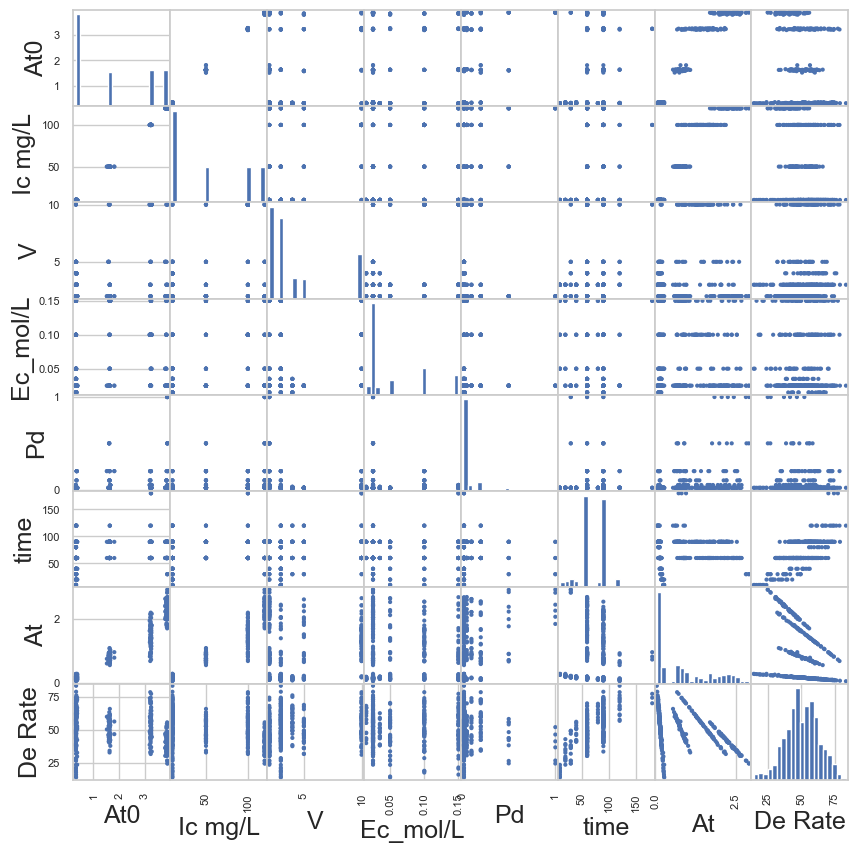

In [20]:
data = pd.read_excel("实验数据.xlsx",sheet_name='Sheet1')
data_1 = data[['At0','Ic mg/L','V','Ec_mol/L','Pd','time','At','De Rate']]
pd.plotting.scatter_matrix(data_1, figsize=(10, 10), alpha=1, hist_kwds={"bins": 20})
plt.show()

In [64]:
# 自定义颜色
colors = ["#FA5858", "#58D3F7", "#FAAC58","#0aa370"]
palette = sns.color_palette(colors)

<Figure size 800x640 with 0 Axes>

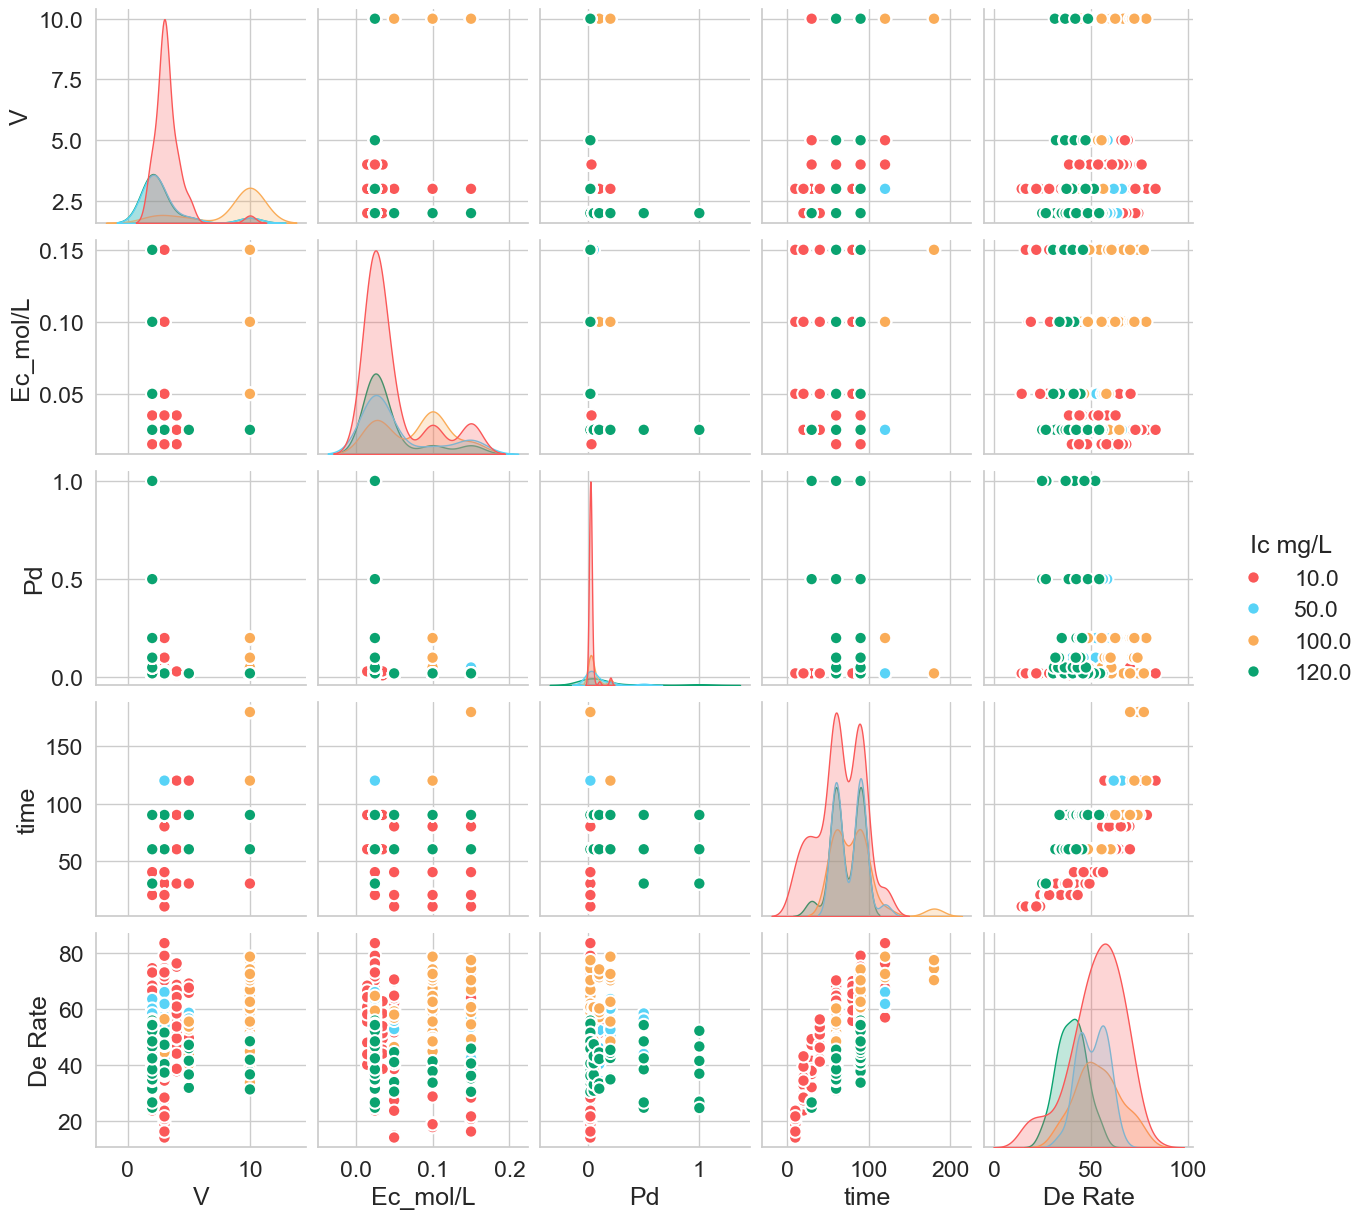

In [58]:
data_2 = data[['Ic mg/L','V','Ec_mol/L','Pd','time','De Rate']]
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(data_2,hue='Ic mg/L',palette=palette,plot_kws=dict(s=80,edgecolor="white",linewidth=1.5))
plt.show()

In [75]:
def diag_plot(x,**kwargs):
    mean = x.mean()
    std = x.std()
    min_val = x.min()
    max_val = x.max()
    plt.text(0.5, 0.5, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}',
             horizontalalignment='center', verticalalignment='center', fontsize=12,
             transform=plt.gca().transAxes)

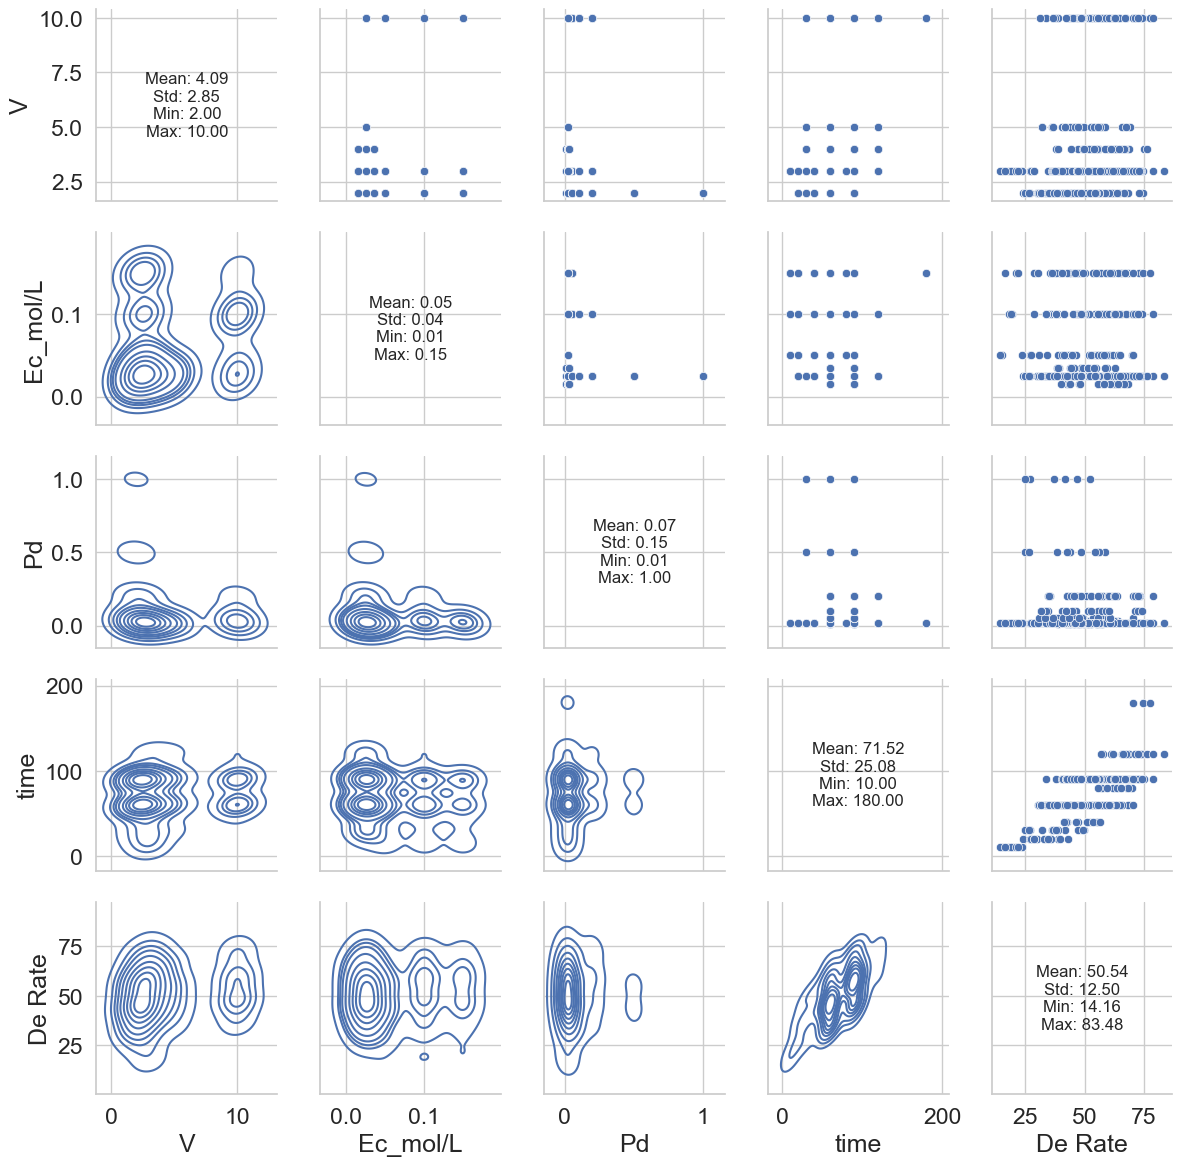

In [76]:
g = sns.PairGrid(data_1,vars=['V','Ec_mol/L','Pd','time','De Rate'])
g.map_upper(sns.scatterplot)#上三角绘制散点图
g.map_diag(diag_plot)#对角线绘制直方图
g.map_lower(sns.kdeplot)#下三角绘制核密度估计图
g.add_legend()
g.fig.set_size_inches(12,12)
sns.set(style='whitegrid',font_scale=1.5)

D:\Anaconda3\envs\env39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
D:\Anaconda3\envs\env39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
D:\Anaconda3\envs\env39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
D:\Anaconda3\envs\env39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x

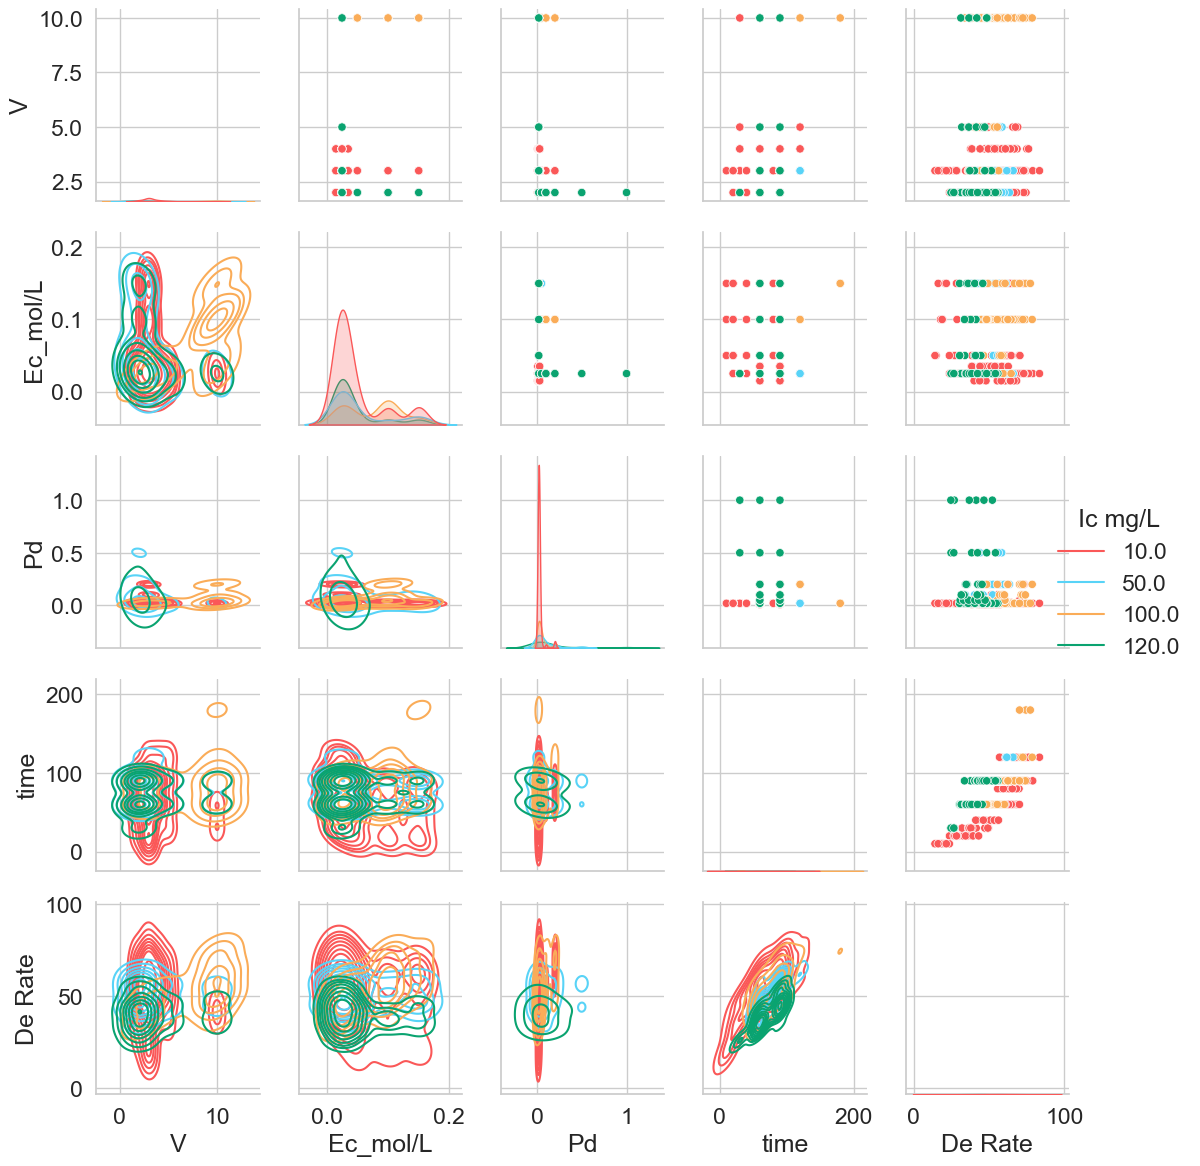

In [63]:
g = sns.PairGrid(data_1,vars=['V','Ec_mol/L','Pd','time','De Rate'],hue='Ic mg/L',
                 palette=palette)
g.map_upper(sns.scatterplot)#上三角绘制散点图
g.map_diag(sns.kdeplot,shade=True)#对角线绘制直方图
g.map_lower(sns.kdeplot)#下三角绘制核密度估计图
g.add_legend()
g.fig.set_size_inches(12,12)
sns.set(style='whitegrid',font_scale=1.5)


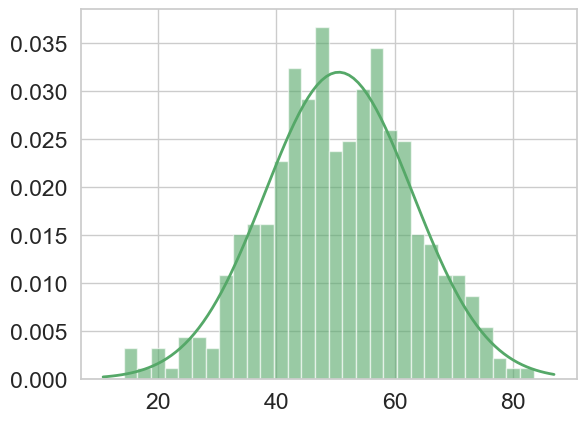

In [67]:
# 绘制直方图
plt.hist(data_1['De Rate'], bins=30, density=True, alpha=0.6, color='g')

# 计算均值和标准差
mu, std = np.mean(data_1['De Rate']), np.std(data_1['De Rate'])

# 绘制正态分布曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x-mu)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))
plt.plot(x, p, 'g', linewidth=2)

plt.show()


In [13]:
# Shapiro-Wilk检验
stat, p = stats.shapiro(data_1['At'])
print(f'Statistics={stat}, p={p}')

# 解释结果：如果p值大于显著性水平（例如0.05），则数据可能服从正态分布
alpha = 0.05
if p > alpha:
    print(f'数据看起来服从正态分布 (p={p})')
else:
    print(f'数据不服从正态分布 (p={p})')


Statistics=0.8363314270973206, p=6.105694751066659e-20
数据不服从正态分布 (p=6.105694751066659e-20)


In [26]:
# 计算偏度和峰度
skew = stats.skew(data_1['degradation rate'])
kurtosis = stats.kurtosis(data_1['degradation rate'])

print(f'偏度: {skew}')
print(f'峰度: {kurtosis}')

# 对于正态分布，偏度应为0，峰度应为3
# 如果偏度和峰度与这些值相差较大，则可能不是正态分布


偏度: -0.17836176318129723
峰度: -0.052205911524614734


In [15]:
import seaborn as sns

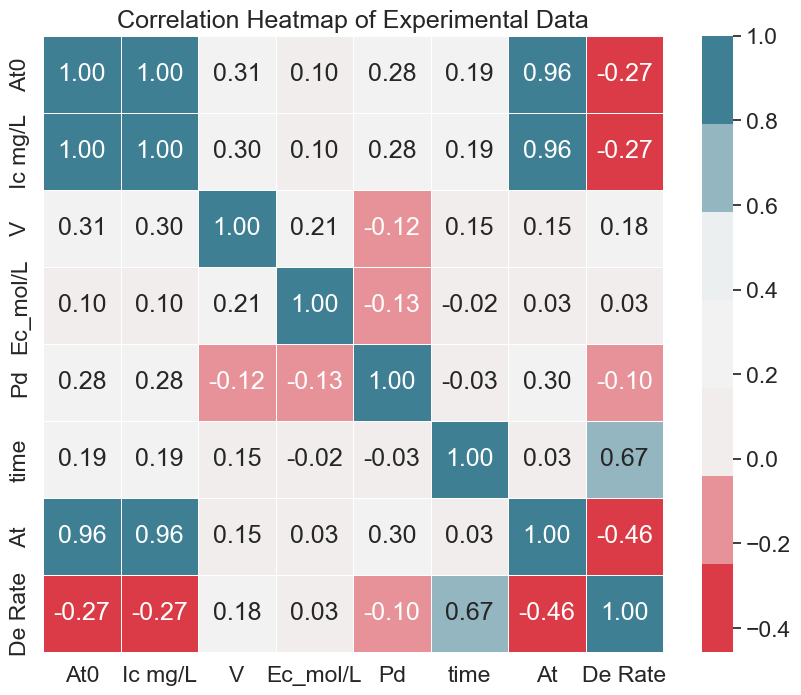

In [77]:
# 计算相关性矩阵
corr_matrix = data_1.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(10,220,sep=80,n=7), fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Experimental Data')
plt.show()

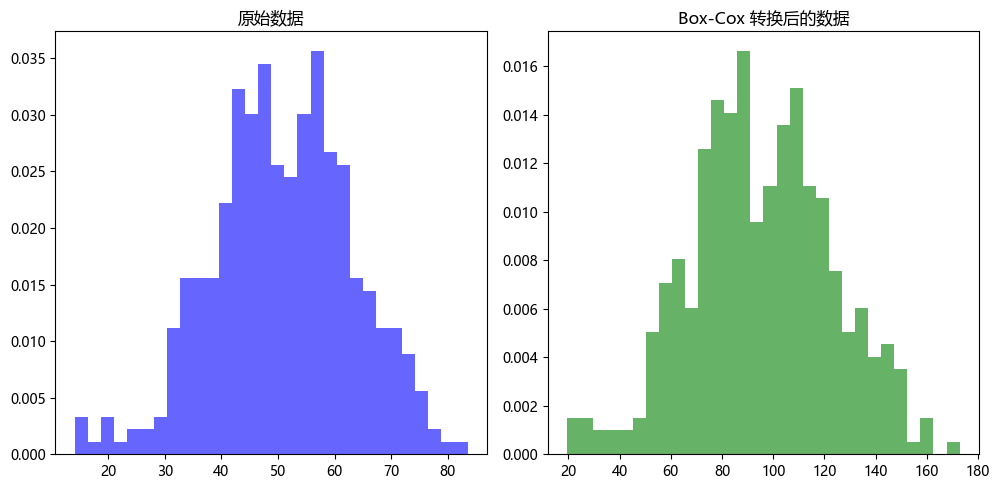

In [27]:
# 使用 scipy 的 boxcox 函数进行转换
# 注意：这里返回两个值，第一个是转换后的数据，第二个是转换参数 lambda
transformed_data, lambda_best = stats.boxcox(data_1['degradation rate'])

# 绘制原始数据和转换后的数据
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data_1['degradation rate'], bins=30, density=True, alpha=0.6, color='blue')
plt.title('原始数据')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, density=True, alpha=0.6, color='green')
plt.title('Box-Cox 转换后的数据')

plt.tight_layout()
plt.show()


In [28]:
lambda_best

1.2082947086568225

In [30]:
# 确保array数据的长度与DataFrame的行数相匹配
assert len(transformed_data) == len(data), "Array length does not match DataFrame rows"
# 将array数据转换为pandas的Series
new_column = pd.Series(transformed_data, name='transformed_degradation')

# 将新的Series作为一列添加到现有的DataFrame中
updated_df = data.assign(New_Column_Name=new_column)

# 将更新后的DataFrame写回到Excel文件中
updated_df.to_excel('实验数据.xlsx', index=False)


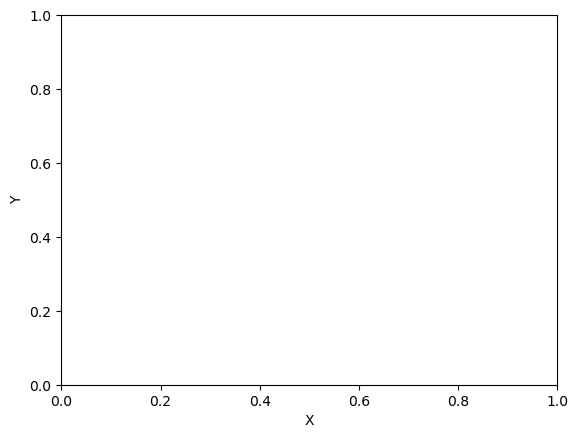

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

point = [[10, 0, 1],[10, 20, 0.68], [50, 0, 1],[50, 20, 0.76]]

plt.xlabel("X")
plt.ylabel("Y")
for i in range(len(point)):
    x = point[i][0]
    y = point[i][1]
    z = point[i][2]
    ax.scatter(x, y, z, color="red")
plt.show()
